In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/101-simple-linear-regressioncsv/1.01. Simple linear regression.csv
/kaggle/input/102-multiple-linear-regression/1.02 Multiple linear regression.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

# Simple Linear Regression

In [3]:
data = pd.read_csv('../input/101-simple-linear-regressioncsv/1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
# feature
x = data['SAT']

# target
y = data['GPA']

In [5]:
x_matrix = x.values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(x_matrix, y)

LinearRegression()

In [6]:
# R-squared
display(reg.score(x_matrix, y))

# coefficiants
display(reg.coef_)

# intercept
display(reg.intercept_)

0.40600391479679765

array([0.00165569])

0.2750402996602803

In [7]:
new_data = pd.DataFrame(data = [1730, 1750], columns = ['SAT'])
reg.predict(new_data)

array([3.13938063, 3.17249439])

In [8]:
new_data['Predicated_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicated_GPA
0,1730,3.139381
1,1750,3.172494


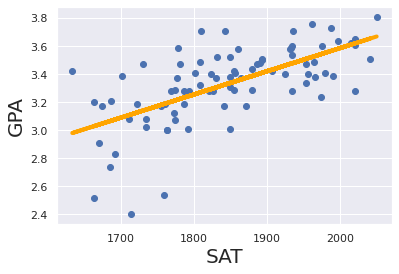

In [9]:
plt.scatter(x, y)
yhat = reg.coef_ * x_matrix + reg.intercept_

fig = plt.plot(x, yhat, lw = 4, c = 'orange', label = 'Regression Line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Multiple Linear Regression

In [10]:
data = pd.read_csv('../input/102-multiple-linear-regression/1.02 Multiple linear regression.csv')
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [11]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [12]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

In [13]:
reg.fit(x, y)

# R-squared
r2 = reg.score(x, y)
display(reg.score(x, y))

# coefficiants
display(reg.coef_)

# intercept
display(reg.intercept_)

0.40668119528142843

array([ 0.00165354, -0.00826982])

0.29603261264909486

In [14]:
n = x.shape[0]
p = x.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.39203134825134023

In [15]:
from sklearn.feature_selection import f_regression

In [16]:
p_values = f_regression(x, y)[1]
p_values.round(3)

array([0.   , 0.676])

In [17]:
reg_summary = pd.DataFrame(data = x.columns.values, columns = ['Features'])
reg_summary['Coefficiants'] = reg.coef_
reg_summary['P-values'] = p_values.round(3)

reg_summary

,Features,Coefficiants,P-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


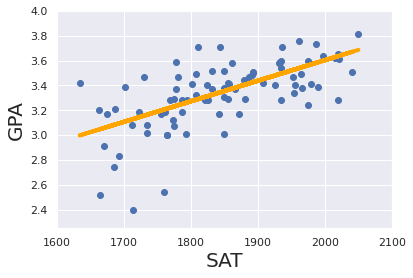

In [18]:
plt.scatter(x['SAT'], y)
yhat = reg.coef_ * x + reg.intercept_

fig = plt.plot(x, yhat, lw = 4, c = 'orange', label = 'Regression Line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.ylim(2.25,4)
plt.xlim(1600, 2100)
plt.show()

# Multiple Linear Regression with standardization

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [21]:
x_scaled = scaler.transform(x)

reg = LinearRegression()
reg.fit(x_scaled, y)

LinearRegression()

In [22]:
reg.coef_, reg.intercept_

(array([ 0.17181389, -0.00703007]), 3.330238095238095)

In [23]:
reg_summary = pd.DataFrame([['Bias'], ['SAT'], ['Rand 1,2,3']], columns = ['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


### Making predictions with standardized coefficiants

In [24]:
new_data = pd.DataFrame([[1700, 2], [1750, 3]], columns = ['SAT', 'Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1750,3


In [25]:
new_scaled_data = scaler.transform(new_data)
reg.predict(new_scaled_data)

array([3.09051403, 3.1649213 ])

In [26]:
reg_simple = LinearRegression()
x_simple_matrix = x_scaled[:,0].reshape(-1, 1)
reg_simple.fit(x_simple_matrix, y)

LinearRegression()

In [27]:
reg_simple.predict(new_scaled_data[:,0].reshape(-1, 1))

array([3.08970998, 3.17249439])